In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/STEAM/AiElements Data Science Internship Assignment Solution/Data/Car Private assignment.csv',sep=";")

In [41]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gass,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,2,3,alfa-romero stelvio,gass,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,3,1,alfa-romero Quadrifoglio,gaas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,4,2,audi 100 ls,gaas,std,four,sedan,fwd,front,99.8,...,NaN,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,5,2,NaN,gaas,std,four,sedan,NaN,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           190 non-null    object 
 3   fueltype          200 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        203 non-null    object 
 6   carbody           196 non-null    object 
 7   drivewheel        202 non-null    object 
 8   enginelocation    202 non-null    object 
 9   wheelbase         203 non-null    float64
 10  carlength         199 non-null    object 
 11  carwidth          204 non-null    object 
 12  carheight         205 non-null    float64
 13  curbweight        199 non-null    float64
 14  enginetype        202 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        202 non-null    float64
 1

In [43]:
df.isnull().sum()

car_ID               0
symboling            0
CarName             15
fueltype             5
aspiration           0
doornumber           2
carbody              9
drivewheel           3
enginelocation       3
wheelbase            2
carlength            6
carwidth             1
carheight            0
curbweight           6
enginetype           3
cylindernumber       0
enginesize           3
fuelsystem           7
boreratio            3
stroke               1
compressionratio     0
horsepower           0
peakrpm              0
citympg              0
highwaympg           0
price                0
dtype: int64

In [44]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

55

In [45]:
for column in df.columns:
    print('{0} has {1} unique values'.format(column, df[column].nunique()))

car_ID has 205 unique values
symboling has 6 unique values
CarName has 138 unique values
fueltype has 7 unique values
aspiration has 2 unique values
doornumber has 2 unique values
carbody has 8 unique values
drivewheel has 3 unique values
enginelocation has 2 unique values
wheelbase has 53 unique values
carlength has 78 unique values
carwidth has 47 unique values
carheight has 49 unique values
curbweight has 167 unique values
enginetype has 7 unique values
cylindernumber has 10 unique values
enginesize has 44 unique values
fuelsystem has 9 unique values
boreratio has 38 unique values
stroke has 37 unique values
compressionratio has 32 unique values
horsepower has 60 unique values
peakrpm has 23 unique values
citympg has 29 unique values
highwaympg has 30 unique values
price has 188 unique values


In [46]:
df = df.drop('car_ID', axis=1)

In [47]:
df.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', nan, 'audi fox',
       'audi 100ls', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet monte carlo', 'chevrolet vega 2300', 'dodge rampage',
       'dodge challenger se', 'dodge d200', 'dodge monaco (sw)',
       'dodge colt hardtop', 'dodge colt (sw)', 'dodge coronet custom',
       'dodge dart custom', 'dodge coronet custom (sw)', 'honda civic',
       'honda civic cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'maxda rx3',
       'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4', 'mazda glc custom l', 'buick electra 225 custom',
  

In [48]:
df['CarName'].fillna(value="-", inplace=True)
df = df[df.CarName != '-']

In [49]:
df['Company'] = df['CarName'].apply(lambda x:x.split(' ')[0])

In [50]:
df = df.drop('CarName', axis=1)

In [51]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [52]:
df['Company'] = df['Company'].replace('vokswagen','volkswagen')
df['Company'] = df['Company'].replace('vw','volkswagen')
df['Company'] = df['Company'].replace('toyouta','toyota')
df['Company'] = df['Company'].replace('porcshce','porsche')
df['Company'] = df['Company'].replace('maxda','mazda')
df['Company'] = df['Company'].replace('Nissan','nissan')

In [53]:
df.Company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [54]:
sum([True for idx,row in df.iterrows() if any(row.isnull())])

40

In [55]:
df.fueltype.unique()

array(['gass', 'gaas', 'gas', 'ggs', 'diesel', 'diesell', nan],
      dtype=object)

In [56]:
df['fueltype'] = df['fueltype'].replace('gass','gas')
df['fueltype'] = df['fueltype'].replace('gaas','gas')
df['fueltype'] = df['fueltype'].replace('ggs','gas')
df['fueltype'] = df['fueltype'].replace('diesell','diesel')
df['fueltype'] = df['fueltype'].replace('diiesell','diesel')

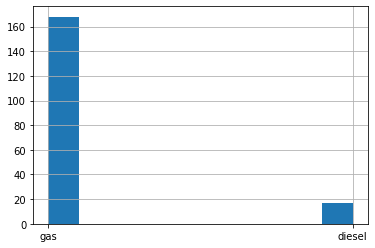

In [57]:
df['fueltype'].hist()

In [58]:
df['fueltype'].fillna(value="gas", inplace=True)

In [59]:
df.fueltype.unique()

array(['gas', 'diesel'], dtype=object)

In [60]:
df.aspiration.unique()

array(['std', 'turbo'], dtype=object)

In [61]:
df.doornumber.unique()

array(['two', 'four', nan], dtype=object)

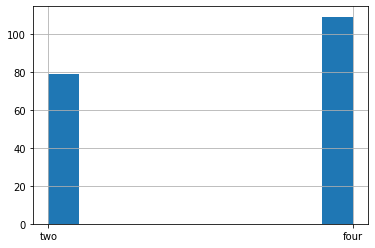

In [62]:
df['doornumber'].hist()

In [63]:
df['doornumber'].fillna(value="four", inplace=True)

In [64]:
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', nan, 'wagon', 'fwd',
       'hatchpack', 'ssedan', 'hardtop'], dtype=object)

In [65]:
df['carbody'] = df['carbody'].replace('hatchpack','hatchback')
df['carbody'] = df['carbody'].replace('ssedan','sedan')
df.carbody.unique()

array(['convertible', 'hatchback', 'sedan', nan, 'wagon', 'fwd',
       'hardtop'], dtype=object)

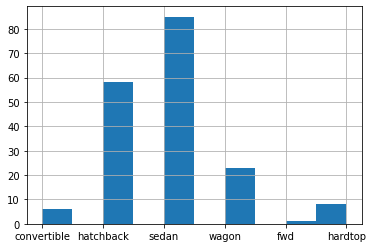

In [66]:
df['carbody'].hist()

In [67]:
df['carbody'].fillna(value="sedan", inplace=True)

In [68]:
df.drivewheel.unique()

array(['rwd', 'fwd', nan, '4wd'], dtype=object)

In [69]:
df['drivewheel'] = df['drivewheel'].replace('fwd','4wd')

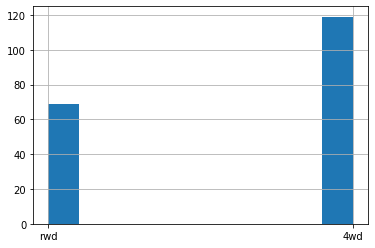

In [70]:
df['drivewheel'].hist()

In [71]:
df['drivewheel'].fillna(value="4wd", inplace=True)

In [72]:
df.drivewheel.unique()

array(['rwd', '4wd'], dtype=object)

In [73]:
df.enginelocation.unique()

array(['front', nan, 'rear'], dtype=object)

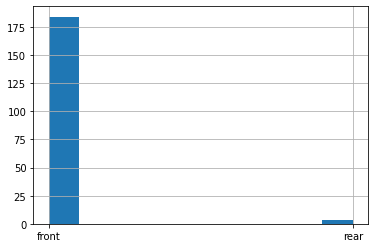

In [74]:
df['enginelocation'].hist()

In [75]:
df['enginelocation'].fillna(value="front", inplace=True)

In [76]:
df.enginelocation.unique()

array(['front', 'rear'], dtype=object)

In [77]:
df.wheelbase.unique()

array([ 88.6,  94.5,  99.8, 105.8,  99.5, 101.2, 103.5, 110. ,  93.7,
       103.3,  95.9,  86.6,  96.5,  94.3,  96. , 113. ,  93.1,  95.3,
        98.8, 104.9, 106.7, 115.6,  96.6, 120.9, 112. , 102.7,   nan,
        93. ,  96.3,  95.1,  97.2, 100.4,  91.3,  99.2, 107.9, 114.2,
       108. ,  89.5,  98.4,  96.1,  99.1,  93.3,  97. ,  96.9,  95.7,
       102.4, 102.9, 104.5,  97.3, 104.3, 109.1])

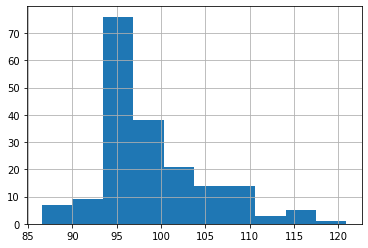

In [78]:
df['wheelbase'].hist()

In [79]:
mean_value=round(df['wheelbase'].mean(), 2)
print(mean_value)

98.77


In [80]:
df['wheelbase'].fillna(value=mean_value, inplace=True)

In [81]:
df.carlength.unique()

array(['168.8', '171.2', '176.6', '177.3', '192.7', '178.2', '176.8',
       '189', '193.8', '197', '155.9', '158.8', '157.3', '174.6', '173.2',
       '144.6', '150', '163.4', '157.1', '167.5', '175.4', '169.1',
       '170.7', '172.6', '199.6', '159.1', '166.8', '169', '177.8', '175',
       '190.9', '187.5', '202.6', '180.3', '208.1', '199.2', '178.4',
       'gg', '173', '172.4', '165.3', '170.2', '165.6', nan, '162.4',
       '173.4', '181.7', '184.6', 'rr', '178.5', '186.7', '198.9',
       '167.3', '168.9', '175.7', '181.5', '186.6', '156.9', '157.9',
       '172', '173.5', '173.6', '158.7', '169.7', '166.3', '168.7',
       '176.2', '175.6', '183.5', '187.8', '171.7', '159.3', '165.7',
       '180.2', '188.8'], dtype=object)

In [82]:
df['carlength'] = df['carlength'].replace('gg',np.nan)
df['carlength'] = df['carlength'].replace('aa',np.nan)
df['carlength'] = df['carlength'].replace('rr',np.nan)

In [83]:
df.carlength.unique()

array(['168.8', '171.2', '176.6', '177.3', '192.7', '178.2', '176.8',
       '189', '193.8', '197', '155.9', '158.8', '157.3', '174.6', '173.2',
       '144.6', '150', '163.4', '157.1', '167.5', '175.4', '169.1',
       '170.7', '172.6', '199.6', '159.1', '166.8', '169', '177.8', '175',
       '190.9', '187.5', '202.6', '180.3', '208.1', '199.2', '178.4', nan,
       '173', '172.4', '165.3', '170.2', '165.6', '162.4', '173.4',
       '181.7', '184.6', '178.5', '186.7', '198.9', '167.3', '168.9',
       '175.7', '181.5', '186.6', '156.9', '157.9', '172', '173.5',
       '173.6', '158.7', '169.7', '166.3', '168.7', '176.2', '175.6',
       '183.5', '187.8', '171.7', '159.3', '165.7', '180.2', '188.8'],
      dtype=object)

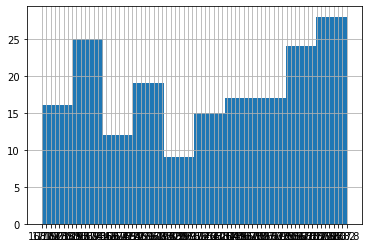

In [84]:
df['carlength'].hist()

In [85]:
df["carlength"] = df["carlength"].astype(float)

In [86]:
mean_value=round(df['carlength'].mean(), 2)
print(mean_value)

174.07


In [87]:
df['carlength'].fillna(value=mean_value, inplace=True)

In [88]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

curbweight has 5 null values
enginetype has 3 null values
enginesize has 3 null values
fuelsystem has 7 null values
boreratio has 2 null values
stroke has 1 null values


In [89]:
df.carwidth.unique()

array(['64.1', '65.5', '66.2', '66.3', '71.4', '67.9', '64.8', '66.9',
       '70.9', '63.6', '63.8', '64.6', '63.9', '64', '65.2', '62.5', '66',
       '61.8', '69.6', '64.2', '65.7', '66.5', '66.1', '70.3', '71.7',
       '70.5', '72', '68', '64.4', '65.4', 'a68.4', '68.4', '68.3',
       'r63.8', '65', '72.3', '66.6', '63.4', 'v65.4', '65.6', '67.7',
       '67.2', '68.9', '68.8'], dtype=object)

In [90]:
df['carwidth'] = df['carwidth'].replace('a68.4','68.4')
df['carwidth'] = df['carwidth'].replace('r63.8','63.8')
df['carwidth'] = df['carwidth'].replace('v65.4','65.4')

In [91]:
df.carwidth.unique()

array(['64.1', '65.5', '66.2', '66.3', '71.4', '67.9', '64.8', '66.9',
       '70.9', '63.6', '63.8', '64.6', '63.9', '64', '65.2', '62.5', '66',
       '61.8', '69.6', '64.2', '65.7', '66.5', '66.1', '70.3', '71.7',
       '70.5', '72', '68', '64.4', '65.4', '68.4', '68.3', '65', '72.3',
       '66.6', '63.4', '65.6', '67.7', '67.2', '68.9', '68.8'],
      dtype=object)

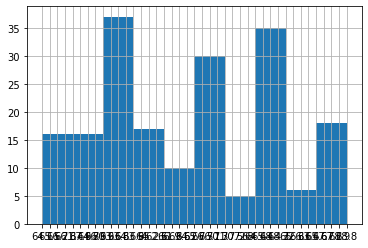

In [92]:
df['carwidth'].hist()

In [93]:
df["carwidth"] = df["carwidth"].astype(float)

In [94]:
mean_value=round(df['carwidth'].mean(), 1)
print(mean_value)

65.9


In [95]:
df['carwidth'].fillna(value=mean_value, inplace=True)

In [96]:
df.carheight.unique()

array([48.8, 52.4, 54.3, 53.1, 55.7, 55.9, 52. , 53.7, 56.3, 50.8, 50.6,
       59.8, 50.2, 52.6, 54.5, 58.3, 53.3, 54.1, 51. , 53.5, 51.4, 52.8,
       49.6, 55.5, 54.4, 56.5, 58.7, 54.9, 56.7, 55.4, 54.8, 49.4, 51.6,
       54.7, 55.1, 56.1, 49.7, 56. , 50.5, 55.2, 52.5, 53. , 59.1, 53.9,
       55.6, 56.2, 57.5])

In [97]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

curbweight has 5 null values
enginetype has 3 null values
enginesize has 3 null values
fuelsystem has 7 null values
boreratio has 2 null values
stroke has 1 null values


In [98]:
df.curbweight.unique()

array([2548., 2823., 2337., 2507., 2844.,   nan, 3086., 3053., 2395.,
       2710., 2765., 3055., 3230., 3380., 3505., 1874., 1909., 1876.,
       2128., 1967., 1989., 2191., 2535., 2811., 1713., 1819., 1837.,
       1956., 2010., 2024., 2236., 2289., 2304., 2465., 2293., 2734.,
       4066., 1890., 1900., 1905., 1945., 1950., 2380., 2385., 2500.,
       2410., 2443., 2425., 2670., 2700., 3515., 3750., 3495., 3740.,
       3685., 3900., 3715., 2910., 1918., 1944., 2004., 2145., 2328.,
       2833., 2921., 2926., 2405., 2403., 1889., 2017., 1938., 1951.,
       2028., 1971., 2008., 2324., 3095., 3296., 3060., 3071., 3139.,
       3020., 3197., 3430., 3075., 3285., 3485., 3252., 3130., 2778.,
       2756., 2800., 3366., 2579., 2460., 2658., 2695., 2707., 2758.,
       2847., 2050., 2120., 2240., 2190., 2340., 2510., 2290., 2455.,
       2420., 2650., 1985., 2015., 2280., 3110., 2081., 2109., 2275.,
       2094., 2122., 2140., 2169., 2204., 2265., 2540., 2536., 2551.,
       2679., 2714.,

In [99]:
mean_value=round(df['curbweight'].mean(), 0)
print(mean_value)

2554.0


In [100]:
df['curbweight'].fillna(value=mean_value, inplace=True)

In [101]:
df.enginetype.unique()

array(['dohc', 'ohcv', nan, 'ohc', 'rotor', 'l', 'ohcf', 'dohcv'],
      dtype=object)

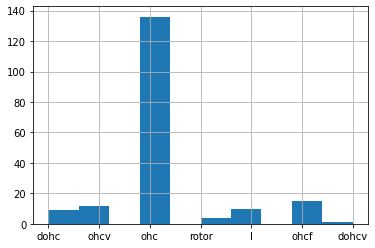

In [102]:
df['enginetype'].hist()

In [103]:
df['enginetype'].fillna(value='ohc', inplace=True)

In [104]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'fours', 'sixx', 'fouor', 'two', 'eight'],
      dtype=object)

In [105]:
df['cylindernumber'] = df['cylindernumber'].replace('sixx','six')
df['cylindernumber'] = df['cylindernumber'].replace('fours','four')
df['cylindernumber'] = df['cylindernumber'].replace('fouor','four')

In [106]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'two', 'eight'], dtype=object)

In [107]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'two', 'eight'], dtype=object)

In [108]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

enginesize has 3 null values
fuelsystem has 7 null values
boreratio has 2 null values
stroke has 1 null values


In [109]:
df.enginesize.unique()

array([130., 152.,  nan, 136., 131., 108., 164., 209.,  90.,  98., 122.,
       156.,  92.,  79., 110., 111., 119., 258.,  91.,  70.,  80., 140.,
       134., 183., 234., 308., 304.,  97., 103., 120., 181., 151., 194.,
       203., 132., 121., 146., 171., 161., 109., 141., 173., 145.])

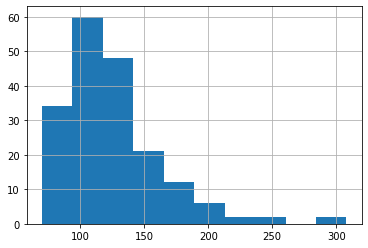

In [110]:
df['enginesize'].hist()

In [111]:
mean_value=round(df['enginesize'].mean(), 0)
print(mean_value)

126.0


In [112]:
df['enginesize'].fillna(value=mean_value, inplace=True)

In [113]:
df.fuelsystem.unique()

array(['mpfi', nan, '/', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi',
       'spdi'], dtype=object)

In [114]:
df['fuelsystem'] = df['fuelsystem'].replace('/',np.nan)

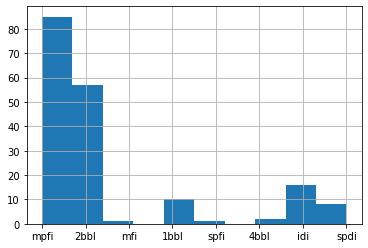

In [115]:
df['fuelsystem'].hist()

In [116]:
df['fuelsystem'].fillna(value='mpfi', inplace=True)

In [117]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

boreratio has 2 null values
stroke has 1 null values


In [118]:
df.boreratio.unique()

array([3.47, 2.68, 3.19, 3.13, 3.5 , 3.31, 3.62, 3.03, 2.97, 3.34, 3.6 ,
       2.91, 2.92, 3.15, 3.43, 3.63, 3.08, 3.33, 3.39, 3.76, 3.58, 3.46,
       3.8 , 3.78, 3.17, 3.35, 3.59, 2.99, 3.7 ,  nan, 3.61, 3.94, 3.74,
       3.54, 2.54, 3.05, 3.27, 3.24, 3.01])

In [119]:
mean_value=round(df['boreratio'].mean(), 2)
print(mean_value)

3.33


In [120]:
df['boreratio'].fillna(value=mean_value, inplace=True)

In [121]:
for column in df:
    if df[column].isnull().any():
       print('{0} has {1} null values'.format(column, df[column].isnull().sum()))

stroke has 1 null values


In [122]:
df.stroke.unique()

array([2.68 , 3.47 , 3.4  , 2.8  , 3.19 , 3.39 , 3.11 , 3.23 , 3.46 ,
       3.9  , 3.41 , 3.07 , 3.58 , 4.17 , 3.15 , 3.255, 3.16 , 3.64 ,
       3.1  , 3.35 , 3.12 , 3.86 , 3.29 , 3.27 , 3.52 , 2.19 , 3.21 ,
       2.9  , 2.07 ,   nan, 2.36 , 2.64 , 3.03 , 3.08 , 3.5  , 3.54 ,
       2.87 ])

In [123]:
mean_value=round(df['stroke'].mean(), 2)
print(mean_value)

3.25


In [124]:
df['stroke'].fillna(value=mean_value, inplace=True)

In [125]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Company             0
dtype: int64

In [126]:
df.compressionratio.unique()

array([ 9.  , 10.  ,  8.5 ,  8.3 ,  7.  ,  8.8 ,  8.  ,  9.6 ,  9.41,
        9.4 ,  7.6 ,  9.2 , 10.1 ,  9.1 ,  8.1 ,  8.6 , 22.7 , 22.  ,
       21.5 ,  7.5 , 21.9 ,  7.8 ,  8.4 , 21.  ,  9.5 ,  8.7 ,  9.31,
        9.3 ,  7.7 , 22.5 , 23.  ])

In [127]:
df.horsepower.unique()

array(['111', '154', '102', '110', '140', '/', '101', '121', '182', '70',
       '68', '88', '145', '58', '76', '60', '86', '100', '78', '90',
       '176', '135', '84', '64', '120', '72', '123', '155', '184', '175',
       '116', '69', '55', '97', '152', '160', '200', '95', '142', '143',
       '207', '288', '73', '82', '94', '62', '56', '112', '92', '161',
       '156', '52', '85', '114', '162', '134', '106'], dtype=object)

In [128]:
df['horsepower'].mode()

0    68
dtype: object

In [129]:
df['horsepower'] = df['horsepower'].replace('/',68)
df["horsepower"] = df["horsepower"].astype(float)
df.horsepower.unique()

array([111., 154., 102., 110., 140.,  68., 101., 121., 182.,  70.,  88.,
       145.,  58.,  76.,  60.,  86., 100.,  78.,  90., 176., 135.,  84.,
        64., 120.,  72., 123., 155., 184., 175., 116.,  69.,  55.,  97.,
       152., 160., 200.,  95., 142., 143., 207., 288.,  73.,  82.,  94.,
        62.,  56., 112.,  92., 161., 156.,  52.,  85., 114., 162., 134.,
       106.])

In [130]:
df.peakrpm.unique()

array([5000, 5500, 5800, 4250, 5400, 4800, 6000, 4750, 4650, 4200, 4350,
       4500, 5200, 4150, 5600, 5900, 5750, 5100, 5250, 4900, 4400, 6600,
       5300])

In [131]:
df.citympg.unique()

array([21, 19, 24, 17, 16, 23, 20, 15, 38, 37, 31, 49, 30, 27, 25, 26, 36,
       22, 14, 45, 28, 18, 32, 35, 34, 29, 33])

In [132]:
df.highwaympg.unique()

array([27, 26, 30, 25, 20, 22, 29, 28, 43, 41, 38, 24, 54, 42, 34, 33, 31,
       19, 23, 32, 39, 18, 16, 37, 50, 36, 47, 46])

In [133]:
df.price.unique()

array(['13495', '16500', '13950', '15250', '17710', '?', '23875',
       '17859.167', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '6295', '6575', '5572', '6377', '7957', '6229',
       '6692', '7609', '8558', '8921', '12964', '6479', '6855', '5399',
       '7129', '7295', '7895', '9095', '8845', '10295', '12945', '10345',
       '6785', '8916.5', '11048', '35550', '5195', '6095', '6795', '6695',
       '7395', '10945', '11845', '13645', '15645', '8495', '10245',
       '10795', '11245', '18280', '18344', '25552', '28248', '28176',
       '34184', '35056', '40960', '45400', '16503', '5389', '6189',
       '6669', '7689', '9959', '8499', '12629', '14869', '14489', '8189',
       '9279', '5499', '7099', '6649', '6849', '7349', '7299', '7799',
       '7499', '7999', '8249', '8949', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16695',
       '17075', '16630', '17950', '18150', '22018', '32528', '34028',


In [134]:
df['price'] = df['price'].replace('?',np.nan)
df["price"] = df["price"].astype(float)
df.price.unique()

array([13495.   , 16500.   , 13950.   , 15250.   , 17710.   ,       nan,
       23875.   , 17859.167, 16430.   , 16925.   , 20970.   , 21105.   ,
       24565.   , 30760.   , 41315.   , 36880.   ,  6295.   ,  6575.   ,
        5572.   ,  6377.   ,  7957.   ,  6229.   ,  6692.   ,  7609.   ,
        8558.   ,  8921.   , 12964.   ,  6479.   ,  6855.   ,  5399.   ,
        7129.   ,  7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   ,
       12945.   , 10345.   ,  6785.   ,  8916.5  , 11048.   , 35550.   ,
        5195.   ,  6095.   ,  6795.   ,  6695.   ,  7395.   , 10945.   ,
       11845.   , 13645.   , 15645.   ,  8495.   , 10245.   , 10795.   ,
       11245.   , 18280.   , 18344.   , 25552.   , 28248.   , 28176.   ,
       34184.   , 35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,
        6189.   ,  6669.   ,  7689.   ,  9959.   ,  8499.   , 12629.   ,
       14869.   , 14489.   ,  8189.   ,  9279.   ,  5499.   ,  7099.   ,
        6649.   ,  6849.   ,  7349.   ,  7299.   , 

In [135]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               2
Company             0
dtype: int64

In [136]:
df = df.dropna()

In [137]:
df.isnull().sum()

symboling           0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
Company             0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         188 non-null    int64  
 1   fueltype          188 non-null    object 
 2   aspiration        188 non-null    object 
 3   doornumber        188 non-null    object 
 4   carbody           188 non-null    object 
 5   drivewheel        188 non-null    object 
 6   enginelocation    188 non-null    object 
 7   wheelbase         188 non-null    float64
 8   carlength         188 non-null    float64
 9   carwidth          188 non-null    float64
 10  carheight         188 non-null    float64
 11  curbweight        188 non-null    float64
 12  enginetype        188 non-null    object 
 13  cylindernumber    188 non-null    object 
 14  enginesize        188 non-null    float64
 15  fuelsystem        188 non-null    object 
 16  boreratio         188 non-null    float64
 1

In [139]:
df.to_csv('/content/gdrive/MyDrive/Colab Notebooks/STEAM/AiElements Data Science Internship Assignment Solution/Data/CleanData.csv') 